## **🐧 Penguin Project 🐧**

by Katie Callo, Erin Choi, and Daniel Broeng

### **Group Contribution Statement:**

**Katie** led the import/clean data/ summary statistics/display table, led Figure 1, and created the Neural Network (including the plot_island and plot_confusion_matricies functions) also leading the Neural Network Discussion.

**Erin**: Assisted in completing Figure 2 and models 2 and 3 as well as assisted in writing comments and wrote most of the descriptions for the models and narrative text to walk readers through the analysis.


**Daniel**: Made important contribution to data cleaning, led Figure 3, and created Machine Learning model 3 with help from Katie.

We all checked each other’s work and made revisions to code and writing also collaborating on Figure 2.” We all played a part in writing the discussion for our models and overall, analysis.

## **1. Preparing Data**

### **1a. Data Import and Cleaning**

The following code imports necessary Python modules, loads a penguin dataset from a URL, preprocesses the data by shortening species names, **splitting it into training and test sets**, and defining a function to **clean the data** by removing missing values and encoding qualitative features. Finally, it **applies the cleaning function to both the training and test sets** while suppressing any warnings that may arise during execution.

In [86]:
# imports basic modules here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing # for encoding

# for the neural network
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer # for one shot encoding
from sklearn.metrics import confusion_matrix # for one shot encoding
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # for confusion matrix
from sklearn import preprocessing # for decision regions
import matplotlib.patches as mpatches # for decision regions plot
from sklearn.metrics import accuracy_score # accuracy

# for linear regression
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# import the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

# shorten the name of the species
penguins["Species"] = penguins["Species"].str.split().str.get(0)

# split the data into training and test sets
train_set, test_set = train_test_split(penguins, test_size = 0.2, random_state=42, stratify=penguins['Species'])

# to clean the data
def clean_data(df):
  """
  takes in data set and returns cleaned dataset

  Parameters: df -- pandas data frame to be cleaned

  Returns: data set that has dropped missing values, gets rid of values that are just periods, encodes qualitative as ints
  """
  # handles missing values:
  #remove last column of the data (comments). This is almost all NaN values, so dropna would remove almost all rows.
  df_clean = df.drop(columns=df.columns[-1])

  # handles missing values:
  df_clean = df_clean.dropna()

  # handles values that are just periods:
  df_clean = df_clean[~df_clean.apply(lambda x: x == '.', axis=1).any(axis=1)]

  return df_clean


# Clean the training and test sets separately
train_set_cleaned = clean_data(train_set)
test_set_cleaned = clean_data(test_set)

#print(train_set_cleaned.head()) # tests how my cleaned data looks

# **2. Exploratory Analysis**

### **2a. Summary Statistics**

The following table  provides a concise summary of the central tendency, dispersion, and shape of the numerical variables in the dataset. This summary includes count, mean, standard deviation, minimum, maximum, and percentiles, offering valuable insights into the distribution and variability of the data, aiding in understanding its overall structure and potential outliers.

In [87]:
summary_stats = train_set_cleaned.describe() #describes our training set
summary_stats

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,64.914062,44.231641,17.146875,201.199219,4226.171875,8.743901,-25.676054
std,40.381131,5.517329,2.005949,13.804637,813.696235,0.553568,0.796658
min,1.000000,33.100000,13.100000,172.000000,2700.000000,7.632200,-26.896440
25%,31.750000,39.600000,15.475000,190.000000,3550.000000,8.310892,-26.331485
50%,60.500000,45.200000,17.300000,197.000000,4062.500000,8.652405,-25.841315
75%,97.250000,49.000000,18.700000,213.000000,4812.500000,9.195963,-25.034727
max,151.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


From the table, we can tell the sample compares 256 penguins ranging in culmen lengths/depths, flipper lengths, body mass, and isotope ratios. According to the standard deviation, the isotope ratio differences are not as significant as the differences in physical characteristics.

### **2b. Summary Display Table**



In [88]:
# function to display means of groups (from worksheet w7_013)
def penguin_summary_table(group_cols, value_cols):
    return penguins.groupby(group_cols)[value_cols].mean().round(2)

# unrepetitive cleaning that gets rid of period in the sex column
penguins = penguins[penguins['Sex'] != '.']

# groups by species, sex, island, culmen length/depth, and body mass
summary_table = penguin_summary_table(["Species", "Sex", "Island"],
                                      ["Culmen Length (mm)", "Body Mass (g)",
                                       "Culmen Depth (mm)", "Flipper Length (mm)"])

# displays
display(summary_table)


Culmen Length (mm)  Body Mass (g)  \
Species   Sex    Island                                         
Adelie    FEMALE Biscoe                  37.36        3369.32   
                 Dream                   36.91        3344.44   
                 Torgersen               37.55        3395.83   
          MALE   Biscoe                  40.59        4050.00   
                 Dream                   40.07        4045.54   
                 Torgersen               40.59        4034.78   
Chinstrap FEMALE Dream                   46.57        3527.21   
          MALE   Dream                   51.09        3938.97   
Gentoo    FEMALE Biscoe                  45.56        4679.74   
          MALE   Biscoe                  49.47        5484.84   

                            Culmen Depth (mm)  Flipper Length (mm)  
Species   Sex    Island                                             
Adelie    FEMALE Biscoe                 17.70               187.18  
                 Dream                  17.62               187.85  
                 Torgersen              17.55               188.29  
          MALE   Biscoe                 19.04               190.41  
                 Dream                  18.84               191.93  
                 Torgersen              19.39               194.91  
Chinstrap FEMALE Dream                  17.59               191.74  
          MALE   Dream                  19.25               199.91  
Gentoo    FEMALE Biscoe                 14.24               212.71  
          MALE   Biscoe                 15.72               221.54

This table groups penguins by species, sex, island, and other physical characteristics.

### **2c. Figure 1: Histogram**

Text(0.5, 1.0, 'Gentoo')

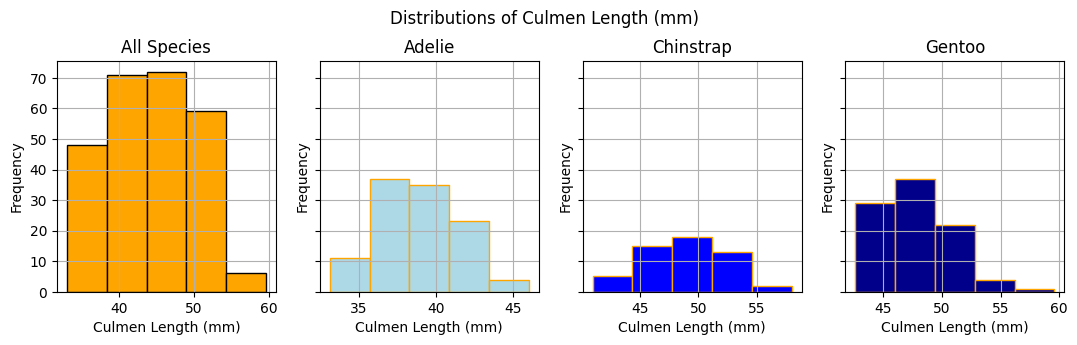

In [89]:
# creates histogram for distribution of culmen length
# orange/ blue colors/edgecolors make it prettier :)

import matplotlib.pyplot as plt

# creates ax with 4 subplots (a general one and one for each species)
fig, ax = plt.subplots(1, 4, figsize=(13, 3), sharey=True)
plt.suptitle("Distributions of Culmen Length (mm)", y=1.05)  # super title for the entire figure that is raised higher

# plt 1: ALL SPECIES
train_set_cleaned['Culmen Length (mm)'].hist(bins=5, color="orange", edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Culmen Length (mm)')  # x label
ax[0].set_ylabel('Frequency')  # y label
ax[0].set_title('All Species')  # title

# plt 2: Adelie
# light blue color and orange edgecolor
train_set_cleaned[train_set_cleaned['Species'] == 'Adelie']['Culmen Length (mm)'].hist(bins=5, color="lightblue", edgecolor='orange', ax=ax[1])
ax[1].set_xlabel('Culmen Length (mm)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Adelie')

# plt 3: Chinstrap
# medium blue color and orange edgecolor
train_set_cleaned[train_set_cleaned['Species'] == 'Chinstrap']['Culmen Length (mm)'].hist(bins=5, color="blue", edgecolor='orange', ax=ax[2])
ax[2].set_xlabel('Culmen Length (mm)')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Chinstrap')

# plt 4: Gentoo
# dark blue color and orange edgecolor
train_set_cleaned[train_set_cleaned['Species'] == 'Gentoo']['Culmen Length (mm)'].hist(bins=5, color="darkblue", edgecolor='orange', ax=ax[3])
ax[3].set_xlabel('Culmen Length (mm)')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Gentoo')


The graphic above compares culmen length within and between species showcasing frequency on the y axis, length on the x axis, and various plots per species. It is worth noting that there are considerably less Chinstrap in the sample in general than Adelie or Gentoo

Overall, this histogram gives us a better idea of how strong an indicator Culmen Length is in distinguishing species. The distinct peaks and variations in the distribution indicate that culmen length is a significant factor in distinguishing between species. If nearly all the penguins fit into one length category/bin (that is there was only one bin with pronounced high frequency), we would know NOT to use culmen length as a separating factor. However, looking at the graph, we can see that there are distinct groups of varying culmen lengths. For instance, Adelie penguins most commonly have culmen lengs just under 40mm while Gentoo most commonly have lengths greater than 45. Thus, culmen length is a good indicator.

Additionally, this histogram reminds us of culmen variation within species (and areas where species can have the same culmen length). Understanding the variation within allows us to see that just because most Chinstrap have an around 50mm culmen, a 45mm culmen can still be a Gentoo or an Adelie (even if this is less likely).

Moreover, observing the overlap in culmen length ranges between species emphasizes the importance of considering other features like culmen depth and the penguin's island habitat to accurately classify them, enhancing the robustness of our feature selection (that will be elaborated on later in this project).

### **2d. Figure 2: Scatter Plot**

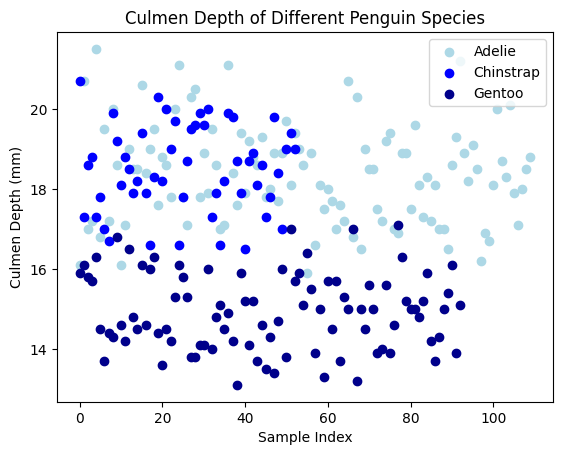

In [90]:
# Extracts Culmen Depth for each species
Adelie_depth = train_set_cleaned[train_set_cleaned["Species"] == "Adelie"]["Culmen Depth (mm)"]
Chinstrap_depth = train_set_cleaned[train_set_cleaned["Species"] == "Chinstrap"]["Culmen Depth (mm)"]
Gentoo_depth = train_set_cleaned[train_set_cleaned["Species"] == "Gentoo"]["Culmen Depth (mm)"]

# Create a figure with one subplot
fig, ax = plt.subplots(1)  # Corrected from plt.subplot to plt.subplots

# Plot scatter plots for each species
ax.scatter(range(len(Adelie_depth)), Adelie_depth, label='Adelie', color="lightblue")
ax.scatter(range(len(Chinstrap_depth)), Chinstrap_depth, label='Chinstrap', color = "blue")
ax.scatter(range(len(Gentoo_depth)), Gentoo_depth, label='Gentoo', color = "darkblue")

# Add legend and labels
ax.legend()
ax.set_xlabel('Sample Index')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_title('Culmen Depth of Different Penguin Species')

# Show the plot
plt.show()

The scatter plot in the image visualizes the culmen depth of three different penguin species: Adelie, Chinstrap, and Gentoo. The culmen depth is measured in millimeters and is plotted on the y-axis, while the x-axis represents a sample index, which is likely a numerical label for individual penguin observations.

Each point on the plot corresponds to a single penguin's culmen depth measurement.
The points are color-coded to distinguish between the species: light blue for Adelie, medium blue for Chinstrap, and dark blue for Gentoo.
From the distribution of points, we can infer the following:

From the scatterplot, we can see that the Adelie species tend to have a wider range of culmen depths, clustering mostly between 16 mm and 20 mm. The Chinstrap species has a wider range of culmen depths as well, similar to the Adelie species, around 16 mm to 20 mm. The Gentoo species, on the other hand, shows a narrower range of culmen depths mostly below 16 mm.

This visualization is useful for comparative analysis, allowing researchers or observers to quickly see the differences and variations in culmen depth among these penguin species. It also aids in understanding the distinct culmen depth characteristics of each species, supporting the inclusion of culmen depth as a feature in our feature selection process.

### **2e. Figure 3: Boxplot**

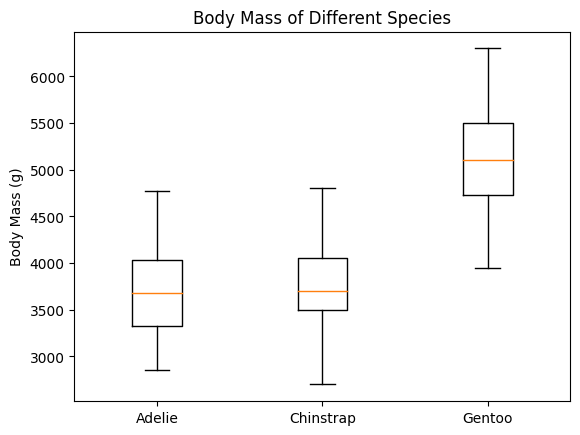

In [91]:
# extracts body mass for each species
Adelie = train_set_cleaned[train_set_cleaned["Species"] == "Adelie"]["Body Mass (g)"]
Chinstrap = train_set_cleaned[train_set_cleaned["Species"] == "Chinstrap"]["Body Mass (g)"]
Gentoo = train_set_cleaned[train_set_cleaned["Species"] == "Gentoo"]["Body Mass (g)"]

fig, ax = plt.subplots(1) # 1 figure
ax.boxplot([Adelie, Chinstrap, Gentoo]) # pass a list to have multiple boxplots

# labels / titles
ax.set_xticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
ax.set(title = "Body Mass of Different Species")
ax.set(ylabel = "Body Mass (g)")

plt.show()

The box plot illustrates the body mass distribution among Adelie, Chinstrap, and Gentoo penguin species in grams. Adelie and Chinstrap show similar median values and interquartile ranges, with Adelie having a slightly lower 25th percentile. In contrast, Gentoo penguins exhibit notably higher median values, indicating a significant difference in body mass compared to the other species. This suggests that body mass could serve as an effective discriminator for Gentoo penguins, as even the outliers of Adelie and Chinstrap species weigh approximately the same as the median Gentoo. Specifically, summary statistics reveal that Adelie and Chinstrap species generally have body mass values ranging from around 2700 to 4700 grams, whereas Gentoo penguins typically weigh between 3800 and 6400 grams, highlighting the substantial disparity in body mass distribution among the three species.

The inclusion of "Culmen Length (mm)", "Culmen Depth (mm)", and "Island" as features in our selection process is supported by the insights gained from the box plot analysis of body mass distribution among Adelie, Chinstrap, and Gentoo penguin species. Body mass, as illustrated by the box plot, serves as a distinguishing factor for Gentoo penguins, with significantly higher median values compared to Adelie and Chinstrap species. This observation aligns with the understanding that body mass can be influenced by various factors, including culmen length and depth, as well as environmental factors such as the penguin's island habitat.

# **3. Feature Selection**

To select the most predictive features for classifying penguin species, we conducted a comprehensive analysis focusing on both quantitative and qualitative variables. For quantitative features, we chose Culmen Length and Culmen Depth. These choices are grounded in biological significance and statistical evidence suggesting that these dimensions are crucial for species differentiation. Culmen Length and Depth vary significantly among species, reflecting adaptations to different ecological niches and feeding habits. These morphological differences are not arbitrary but have evolved due to the ecological requirements of each species, making them reliable indicators of species identity.

For the qualitative feature, we selected the Island on which the penguin was encountered. This choice is motivated by the geographical distribution patterns of penguin species. Certain species are more prevalent or exclusively found on specific islands, making the island a proxy for ecological environments and, indirectly, for differentiating species. The habitat preference is closely tied to breeding, feeding, and survival strategies, which are distinct among species.

### **3a. Cleaning Data**

In [92]:
def encode(df_clean):
  """
  takes clean data and encodes it numerically to be better used in heatmap/models

  returns: cleaned and now encoded data
  """

  #encodes qualitaitve/categorical as integers and ensures that all NAs are dropped
  le = preprocessing.LabelEncoder()
  df_clean['Sex'] = le.fit_transform(df_clean['Sex'])
  #df_clean['Sex'] = df_clean['Sex'].map({'FEMALE': 1, 'MALE': 0}) # sex: female = 1, males = 0

  df_clean['Island'] = pd.factorize(df_clean['Island'])[0] # uses factorize to encode islands

  # one-hot encoding for multi-category variables for species/island
  df_clean = pd.get_dummies(df_clean, columns=['Species']) # species: Adelie = 0, etc.

  return df_clean

# applies
train_encoded = encode(train_set)
test_encoded = encode(test_set)

# clean the training and test sets separately
train_set_cleaned = clean_data(train_set)
test_set_cleaned = clean_data(test_set)

# encode the cleaned data
train_set_encoded = encode(train_set_cleaned)
test_set_encoded = encode(test_set_cleaned)



### **3b. Selecting Features for Decision Tree Model**

To identify the suitable features for our model, we generated a correlation heat map to explore the relationships between various features within our dataset.

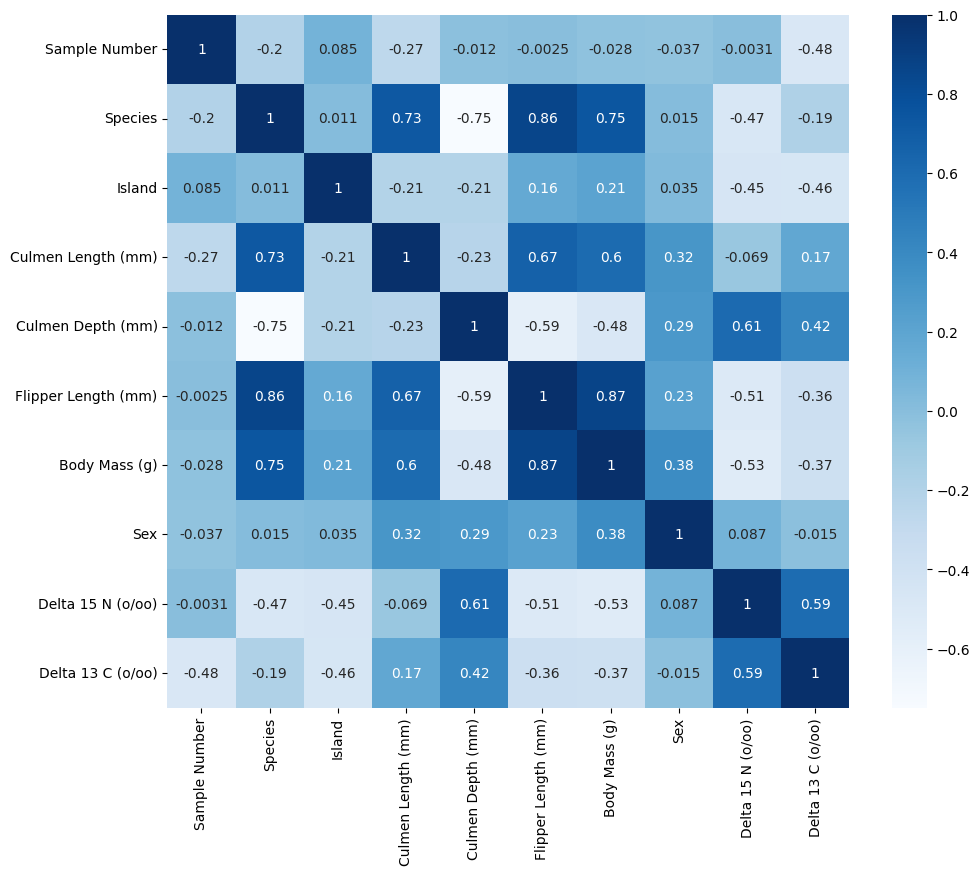

('Most Correlated Features to Species: ',
 Species                1.000000
 Culmen Length (mm)     0.729949
 Culmen Depth (mm)      0.749252
 Flipper Length (mm)    0.862184
 Body Mass (g)          0.746881
 Name: Species, dtype: float64)

In [93]:
# correlation heat map


def showHeatmap():
  """
  creates a display table and returns the features with correlation above 0.6
  """

  # encodes species into heat map as it was previously separated in the encode function (which helps for models later on)
  le_species = preprocessing.LabelEncoder()
  train_set_cleaned['Species'] = le_species.fit_transform(train_set_cleaned['Species']) # not included in OG encoding function as it messes with models

  # the figure itself
  plt.figure(figsize=(11,9))
  cor = train_set_cleaned.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
  plt.show()

  # finds which features have correlations to spcecies
  corTarget = abs(cor['Species'])

  #displays the most correlated featuress
  bestFeatures = corTarget[corTarget>0.6] # 0.6 was chosen as a target because from looking at the map darker colors were generally above 0.6

  return "Most Correlated Features to Species: ", bestFeatures


showHeatmap()

In our analysis to predict penguin species, we examined the correlation coefficients of several features with the species classification. Despite Flipper Length (mm) exhibiting the highest correlation (0.862184), we selected Culmen Length (mm) and Culmen Depth (mm) as our quantitative features due to their significant biological relevance and distinct distributions across species, as evidenced by histograms, scatterplots, and boxplots. These features, showing correlations of 0.729949 and 0.749252 respectively, are crucial for species differentiation due to their reflection of ecological adaptations.

For the qualitative feature, Island was chosen based on its substantial correlation and ecological significance. This decision is backed by the distinct ecological characteristics and species-specific distributions across islands, reinforcing Island as a pivotal factor in species identification. The selection process involved a careful consideration of the least correlated features with each other to ensure a diverse representation of predictive variables, thus minimizing redundancy and enhancing the model's accuracy.

Our feature selection strategy, grounded in a combination of statistical analysis and biological insights, optimally positions our decision tree model for efficient species classification. By focusing on Culmen Length, Culmen Depth, and Island, we leverage the most informative predictors that encapsulate critical ecological and morphological distinctions among penguin species. This approach not only boosts the predictive performance but also enriches the model with ecological interpretability, facilitating practical applications in conservation efforts.

## **4. Modeling**

Each Model Contains:

Cross-validation to choose complexity parameters.

Evaluation/ confusion matrix

Decision regions for the model

Discussion

### **4a. Model 1: Neural Network**

**Model Prep Work: Collect Some Predictor Data and Target Data**

In [94]:
def preProcess (train_set_encoded, test_set_encoded, cols, species_columns):
  """
  takes previously encoded data and further scales it/ preprocesses to work for models
  """
  # Handle missing values in x_train and x_test
  x_train = train_set_encoded[cols]
  x_test = test_set_encoded[cols]

  # updates y_train and y_test to match the rows in x_train and x_test
  y_train = train_set_encoded.loc[x_train.index, species_columns]
  y_test = test_set_encoded.loc[x_test.index, species_columns]

  # convert y_train and y_test to a single-label format
  label_encoder = LabelEncoder()
  y_train = label_encoder.fit_transform(y_train.apply(lambda x: '_'.join(map(str, x)), axis=1))
  y_test = label_encoder.transform(y_test.apply(lambda x: '_'.join(map(str, x)), axis=1))

  # preprocess the data
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  return x_train_scaled, y_train, x_test_scaled, y_test

In [95]:
species_columns = ['Species_Adelie', 'Species_Chinstrap', 'Species_Gentoo'] # creates a list of species columns

# creates afunction that creates our neural network
def neuralNetwork(train_set_encoded, test_set_encoded, cols, species_columns):
  """
  trains and evaluates neural network classifer on selected encoded/cleaned data set (taking in above encoded test/training sets, selected x_columns, and species)

  Returns:
        float: The accuracy of the neural network on the training set.
        float: The accuracy of the neural network on the test set.
        float: CV score

    The function preprocesses the data, initializes a neural network with a single hidden layer of 100 neurons,
    fits the model to the training data, makes predictions on both the training and test sets, and calculates
    the accuracy of the model on both sets.

    It does it all in one place to make returning metrics about the fit/score easier with unpacking

  """
  # preprocesses
  x_train_scaled, y_train, x_test_scaled, y_test = preProcess(train_set_encoded, test_set_encoded, cols, species_columns)

  # initializes the neural network
  NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

  # fits the model
  fit = NN.fit(x_train_scaled, y_train)
  fit

  # scores the model
  score = NN.score(x_train_scaled, y_train)

  # predictions
  y_pred_train = NN.predict(x_train_scaled)
  y_pred_test = NN.predict(x_test_scaled)

  # accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  # perform 5-fold cross-validation and calculate the mean score
  mean_score = cross_val_score(NN, x_train_scaled, y_train, cv=5).mean()

  return NN, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test

**Cross Validation**

In [96]:
# examines all columns
# dif combos of 3 features (2 quantitative and 1 qualitative)
combos = [
    ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"],
    ["Flipper Length (mm)", "Body Mass (g)", "Island"],
    ["Culmen Depth (mm)", "Island", "Body Mass (g)"],
    ["Flipper Length (mm)", "Body Mass (g)", "Sex"],
    ["Culmen Length (mm)", "Island", "Flipper Length (mm)"],
    ["Culmen Length (mm)", "Sex", "Flipper Length (mm)"],
    ["Culmen Depth (mm)", "Sex", "Body Mass (g)"],
    ["Culmen Depth (mm)", "Island", "Flipper Length (mm)"]
]

def displayScores(cols, train_accuracy, test_accuracy, mean_score):
  """
  prints scores of selected features from 5-fold cross-validation
  """
  print(f"Features: {cols}") # features
  print(f"Training Accuracy: {train_accuracy}") # accuracy based on predictions
  print(f"Test Accuracy: {test_accuracy}") # accuracy based on predictions
  print(f"CV score: {mean_score}")
  print("\n------") # to make it look neater


# checking score for each combo
for cols in combos:
    NN, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test= neuralNetwork(train_set_encoded, test_set_encoded, cols, species_columns)
    displayScores(cols, train_accuracy, test_accuracy, mean_score)

Features: ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
Training Accuracy: 0.9961832061068703
Test Accuracy: 0.9705882352941176
CV score: 0.9923802612481858

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Island']
Training Accuracy: 0.9122137404580153
Test Accuracy: 0.8529411764705882
CV score: 0.8931059506531206

------
Features: ['Culmen Depth (mm)', 'Island', 'Body Mass (g)']
Training Accuracy: 0.8778625954198473
Test Accuracy: 0.8088235294117647
CV score: 0.8436865021770682

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Sex']
Training Accuracy: 0.8740458015267175
Test Accuracy: 0.6029411764705882
CV score: 0.8473875181422352

------
Features: ['Culmen Length (mm)', 'Island', 'Flipper Length (mm)']
Training Accuracy: 0.9923664122137404
Test Accuracy: 0.9411764705882353
CV score: 0.988534107402032

------
Features: ['Culmen Length (mm)', 'Sex', 'Flipper Length (mm)']
Training Accuracy: 0.9770992366412213
Test Accuracy: 0.8235294117647058
CV score: 0.9

According to the above CV score and accuracy comparisons, the first model is the most accurate with the highest CV score. Thus, we are going to select the feautres Culmen Length, Depth, and Island that is three layers (our complexity parameter)

**Our Selected Model: ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]**

In [97]:
# reminder of accuracy
x_columns = ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]

NN, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test = neuralNetwork(train_set_encoded, test_set_encoded, x_columns, species_columns) #unpacks
print(f"Training Accuracy: {train_accuracy}") # prints training
print(f"Test Accuracy: {test_accuracy}") # prints tests
print("The mean of the training accuracy and testing accuracy score:", mean_score) # prints mean score

Training Accuracy: 0.9961832061068703
Test Accuracy: 0.9705882352941176
The mean of the training accuracy and testing accuracy score: 0.9923802612481858


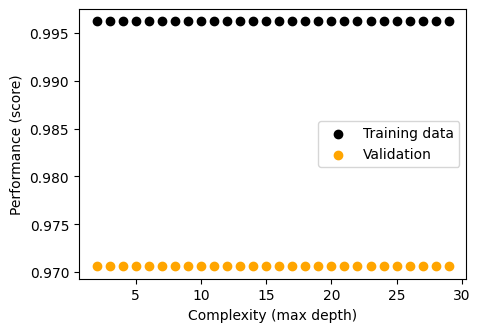

In [98]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))  # creates figure

for d in range(2, 30):
    NN.fit(x_train_scaled, y_train)

    # adds a label to the first scatter plot of each color
    if d == 2:
        ax.scatter(d, NN.score(x_train_scaled, y_train), color="black", label="Training data")
        ax.scatter(d, NN.score(x_test_scaled, y_test), color="orange", label="Validation")
    else:
        ax.scatter(d, NN.score(x_train_scaled, y_train), color="black")
        ax.scatter(d, NN.score(x_test_scaled, y_test), color="orange")

ax.set(xlabel="Complexity (max depth)", ylabel="Performance (score)")  # adds labels

# legend
ax.legend()


A mean cross value score of 0.99 is exceptionally high indicating that the model is performing very well on both the validation sets. (For clarification, this meean score is the average accuracy obtained from a 5-fold cross-validation process, where the training data is split into five parts, and the model is trained and evaluated five times, each time using a different part as the validation set and the rest as the training set.)

As the training accuracy is not too much higher than the test accuracy, I am not too worried about overfitting. Both 97% test accuracy and 99% training accuracy are high scores, and if you look on the graph above the training performance score does not dramatically increase more than the testing performance score even with changes in neural network complexity.

I am choosing these features for the neural network model and will set them as predictor variables.

**Evaluation and Confusion Matrix**

In [99]:
NN.fit(x_train_scaled, y_train)
NN.score(x_test_scaled, y_test)

0.9705882352941176

Above we trained our neural network with the three selected features, scoring it against the testing data. The 0.97 means that our model has a 97% score regarding accuracy when testing with unseen data.

In [100]:
# prediction array
y_test_prediction = NN.predict(x_test_scaled)
y_test_prediction = y_test_prediction

In [101]:
# prep work for confusion matricies
# determines the number of unique classes
num_classes = len(np.unique(y_test))

# converts y_test and y_test_prediction to one-hot encoded format
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)
y_test_prediction_one_hot = lb.transform(y_test_prediction)

for i in range(num_classes):
    # true and predicted labels for the current class
    y_true_class = y_test_one_hot[:, i]
    y_pred_class = y_test_prediction_one_hot[:, i]

species_names = lb.classes_


In [102]:

def plot_confusion_matrices(y_test, y_test_prediction):
    """
    plots confusion matrix for each species

    parameters: takes in the y_test and y_test_prediction (encoding them in function and uses them in conf_matrix)
    """
    # hardcoded species names
    species_names = ['Adelie', 'Chinstrap', 'Gentoo']

    # determines the number of unique classes
    num_classes = len(species_names)

    # converts y_test and y_test_prediction to one-hot encoded format
    lb = LabelBinarizer()
    y_test_one_hot = lb.fit_transform(y_test)
    y_test_prediction_one_hot = lb.transform(y_test_prediction)

    conf_matrices = []

    for i in range(num_classes):
        # true and predicted labels for the current class
        y_true_class = y_test_one_hot[:, i]
        y_pred_class = y_test_prediction_one_hot[:, i]

        # Confusion matrix for the current class
        conf_matrix = confusion_matrix(y_true_class, y_pred_class)
        conf_matrices.append(conf_matrix)

    # plot the confusion matrices for each class
    fig, axes = plt.subplots(1, num_classes, figsize=(18, 5))

    for i, matrix in enumerate(conf_matrices):
        species = species_names[i]
        print(f"Confusion matrix for {species}:\n{matrix}\n")

        ax = axes[i]
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix for {species}") # larger title
        ax.set_xlabel("Actual Value") # x axis label
        ax.set_ylabel("Prediction") # y axis label
        ax.set_xticks([0.5, 1.5]) # ticks are at half way points
        ax.set_xticklabels(['Not ' + species, species])
        ax.set_yticks([0.5, 1.5]) # ticks are at half way points
        ax.set_yticklabels(['Not ' + species, species], rotation=0)

    plt.tight_layout()
    plt.show() # displays

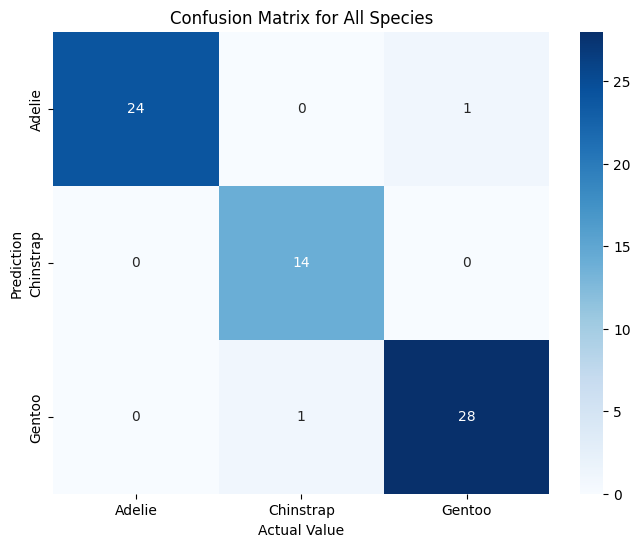

In [103]:
def plot_confusion_matrix_3_by_3(y_test, y_test_prediction):
    """
    plots a 3x3 confusion matrix for all species.

    Parameters:
        y_test: The true labels.
        y_test_prediction: The predicted labels.
    """
    # hardcoded species names simialr to other version of matrix
    species_names = ['Adelie', 'Chinstrap', 'Gentoo']


    # Compute the confusion matrix for all classes
    conf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), y_test_prediction_one_hot.argmax(axis=1))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species_names, yticklabels=species_names)
    plt.xlabel("Actual Value")
    plt.ylabel("Prediction")
    plt.title("Confusion Matrix for All Species")
    plt.show()

plot_confusion_matrix_3_by_3(y_test, y_test_prediction)

Confusion matrix for Adelie:
[[43  0]
 [ 1 24]]

Confusion matrix for Chinstrap:
[[53  1]
 [ 0 14]]

Confusion matrix for Gentoo:
[[38  1]
 [ 1 28]]



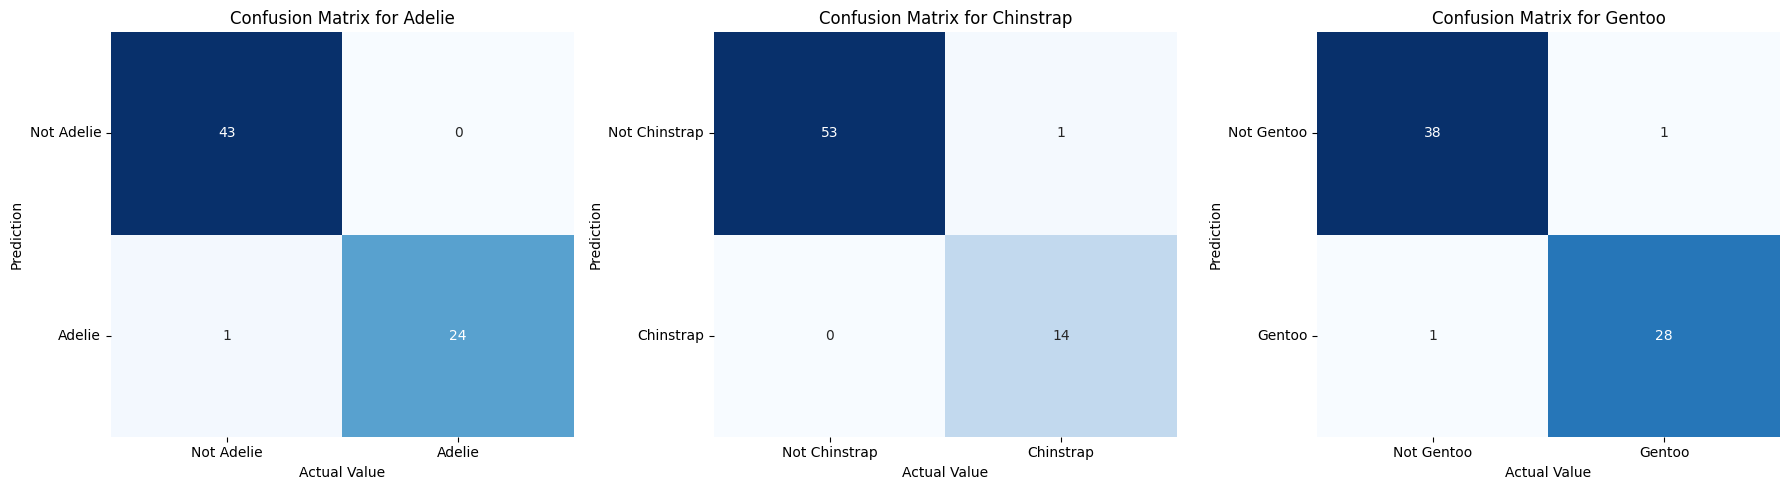

In [104]:
# calls confusion matrix for NN
plot_confusion_matrices(y_test, y_test_prediction) # this is the og confusion matrix I made before putting it into a 3x3 format (I just wanted to add it as a refference)

Overall, the model shows near-perfect classification for all penguin groups (with only 4 cases of errors on the confusion matrix). As seen above, it has near perfect scores for Adelie and Chinstrap with a very high accuracy for Gentoo as well. The minimal misclassification does not significantly impact the overall excellent performance of the model.

The 3 by 3 matrix show that all the Adelie were classified correctly and only one of the Chisntrap (classified erroneosusly as Gentoo) and Gentoo (classified erroneously as Adelie) were wrongly classified.

**Decision Regions**

In [105]:
def plot_island(c, feature1, feature2):
    """
    This makes our decision regions of 'Species' using three factors: Culmen Length (mm), Culmen Depth (mm),
    and Island. The plots are separated by island.

    Parameters:
        c: classifier model, features

    Returns:
        Plots
    """
    # dictionary (keys = island, values = corresponding data)
    dictionary = {
        island: penguins[penguins["Island"] == island]
        for island in penguins["Island"].unique()
    }

    # species labels and corresponding colors
    species_labels = {
        0: 'Adelie',
        1: 'Chinstrap',
        2: 'Gentoo'
    }
    colors = ['blue', 'green', 'red']

    # figure with subplots in a row
    fig, axes = plt.subplots(1, len(dictionary), figsize=(15, 5))  # Adjust figsize as needed

    # loops over each island to create separate plots of decision regions
    for ax, (island, df) in zip(axes, dictionary.items()):
        x0 = df[feature1]  # Culmen Length = horizontal axis
        x1 = df[feature2]  # Culmen Depth = vertical axis
        y = df['label']

        # axis limits based on the min and max of the features with padding
        padding = 1.1  # adjust the padding to fix error of points getting cut off
        x0_min, x0_max = x0.min() - padding, x0.max() + padding
        x1_min, x1_max = x1.min() - padding, x1.max() + padding

        # grid
        grid_x = np.linspace(x0_min, x0_max, 501)
        grid_y = np.linspace(x1_min, x1_max, 501)
        xx, yy = np.meshgrid(grid_x, grid_y)

        # predictions
        XY = np.c_[xx.ravel(), yy.ravel()]  # Extract model predictions to join parts of grid together
        p = c.predict(XY)  # Returns predictions
        p = p.reshape(xx.shape)  # Reshapes to 2D

        # plots
        ax.contourf(xx, yy, p, cmap="jet", alpha=0.2)  # contour to visualize predictions
        ax.scatter(x0, x1, c=y, cmap="jet", vmin=0, vmax=2)  # adds data in scatter plot
        ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)", title=island)  # sets labels and titles
        ax.set_xlim(x0_min, x0_max)
        ax.set_ylim(x1_min, x1_max)

    # legend for all subplots
    handles = [mpatches.Patch(color=colors[i], label=species_labels[i]) for i in range(len(species_labels))]
    fig.legend(handles=handles, title="Species", loc="upper right")  # adjusts legend location

    # display
    plt.show()

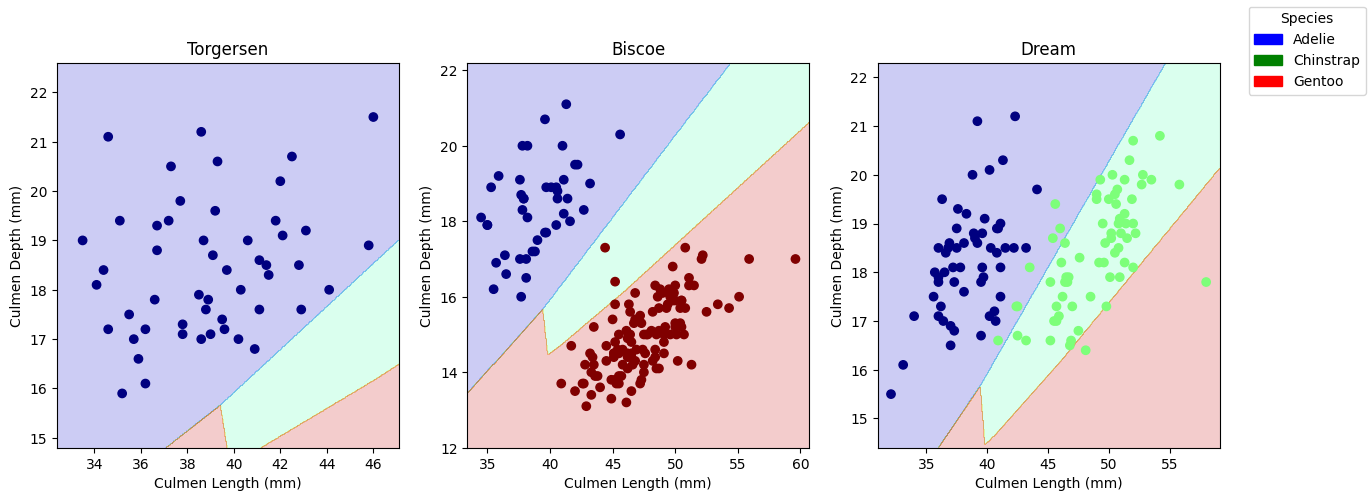

In [106]:
# encode the 'Species' column to integers
le = LabelEncoder()
penguins['label'] = le.fit_transform(penguins['Species'])
test_set_cleaned['label'] = le.transform(test_set_cleaned['Species'])

# define features and labels
X = test_set_cleaned[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = test_set_cleaned['label']

# creates a neural network classifier
NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# fits
NN.fit(X, y)

# plots
plot_island(NN, 'Culmen Length (mm)', 'Culmen Depth (mm)')

The Decision Region shows the Adelie, Chinstrap, and Gentoo separate by island in which there are penguins found on. Each dot corresponds with an individual penguins culmen depth and length. There are 3 islands separated by subplots and 3 species separated by color as shown on the legend. Overall, the majority of Adelie are in Torgersen; however, the ones in Biscoe and Dream have comparably deeper yet shorter culmens. The Gentoo are Biscoe penguins with longer but less deep beaks and the Chinstrap are on dream with relatively longer beaks. This further supports our analysis that the model mainly works as expected from the confusion matrix!

**Mistakes -- Discussion**

In evaluating our model, we can note that the model ocassionally mistakes Biscoe Gentoos as Chinstrap and a couple of Chisntrap on Dream as Adelie and Gentoo. While there are a couple of these discreprancies, the great majority of classifications our correct

**Summary of Neural Network**

Overall, the neural network preforms fairly accurately both on the training and testing data. Even though it occasionally categorizes Adelie and Gentoo penguins as Chinstraps and Chinstraps as Gentoo or Adelie (see decision region), the Neural Network classifies both the training and validating data with over 97% accuracy without a large risk from overfitting!

### **4b. Model 2: Logistic Regression**

In [107]:
# creates afunction that creates our logicstic regression model
def logRegression(train_set_encoded, test_set_encoded, x_columns, species_columns):
  """
  trains and evaluates linear regression model  on selected encoded/cleaned data set (taking in above encoded test/training sets, selected x_columns, and species)

  """
  # preprocesses for classifier
  x_train_scaled, y_train, x_test_scaled, y_test = preProcess(train_set_encoded, test_set_encoded, cols, species_columns)

  # initializes the neural network
  LR  = LogisticRegression()

  # fits the model
  LR.fit(x_train_scaled, y_train)

  # predictions
  y_pred_train = LR.predict(x_train_scaled)
  y_pred_test = LR.predict(x_test_scaled)

  # accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  # perform 5-fold cross-validation and calculate the mean score
  mean_score = cross_val_score(LR, x_train_scaled, y_train, cv=5).mean()

  return LR, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test


**Cross Validation**

In [108]:
# checking score for each combo
for cols in combos:

 LR, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test = logRegression(train_set_encoded, test_set_encoded, cols, species_columns)# unpacks
 displayScores(cols, train_accuracy, test_accuracy, mean_score)

Features: ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
Training Accuracy: 0.9961832061068703
Test Accuracy: 0.9705882352941176
CV score: 0.9923802612481858

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Island']
Training Accuracy: 0.9007633587786259
Test Accuracy: 0.8529411764705882
CV score: 0.8893323657474601

------
Features: ['Culmen Depth (mm)', 'Island', 'Body Mass (g)']
Training Accuracy: 0.8587786259541985
Test Accuracy: 0.8235294117647058
CV score: 0.8512336719883891

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Sex']
Training Accuracy: 0.8282442748091603
Test Accuracy: 0.7647058823529411
CV score: 0.8319303338171263

------
Features: ['Culmen Length (mm)', 'Island', 'Flipper Length (mm)']
Training Accuracy: 0.9809160305343512
Test Accuracy: 0.9705882352941176
CV score: 0.9771407837445573

------
Features: ['Culmen Length (mm)', 'Sex', 'Flipper Length (mm)']
Training Accuracy: 0.9618320610687023
Test Accuracy: 0.8970588235294118
CV score: 0.

The cross-validation data for different sets of features used in penguin species classification models present a clear picture of which combinations are most effective. Analyzing the results, we can draw several conclusions regarding model performance and the predictive power of different features.

Culmen Length, Culmen Depth, and Island:

This combination yielded the highest test accuracy (0.9706) and cross-validation (CV) score (0.9924) among all models, with a near-perfect training accuracy (0.9962). The exceptional performance underscores the predictive strength of culmen measurements combined with the ecological context provided by the island feature. This feature set effectively captures the variance necessary for accurate species classification, demonstrating a strong correlation with species differentiation.

The remaining models, with various combinations including sex, show a general trend where the inclusion of flipper length and body mass without both culmen dimensions results in lower accuracy and CV scores. Particularly, models including sex instead of more specific morphological or ecological features tend to perform worse, suggesting that while sex may influence size and perhaps indirectly species classification, it is not as strong a predictor as the other features considered.

In conclusion, the analysis suggests that a combination of morphological measurements, particularly culmen dimensions, along with ecological context (Island), provides the most accurate classification of penguin species. These features capture essential biological and ecological differences among species, significantly enhancing model performance. The decrease in performance with the inclusion of sex and the replacement of culmen dimensions with other morphological measurements underline the unique importance of culmen characteristics and island location in distinguishing among penguin species.

In [109]:
# reminder of accuracy
# reminder: x_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

LR, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test = logRegression(train_set_encoded, test_set_encoded, x_columns, species_columns) #unpacks

LR.fit(x_train_scaled, y_train)
LR.score(x_test_scaled, y_test)

0.8676470588235294

**Our Selected Model: ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]**

In [110]:
LR, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train,  x_test_scaled, y_test = logRegression(train_set_encoded, test_set_encoded, x_columns, species_columns) #unpacks
print(f"Training Accuracy: {train_accuracy}") # prints training
print(f"Test Accuracy: {test_accuracy}") # prints tests
print("The mean of the training accuracy and testing accuracy score:", mean_score) # prints mean score

Training Accuracy: 0.9007633587786259
Test Accuracy: 0.8676470588235294
The mean of the training accuracy and testing accuracy score: 0.9005805515239478


The training data accuracy is not too far from the test accuracy so we are not concerned about overfitting.

**Evaluation and Confusion Matrix**

In [111]:
y_test_prediction = LR.predict(x_test_scaled)

# determines the number of unique classes
num_classes = len(np.unique(y_test))

# converts y_test and y_test_prediction to one-hot encoded format
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)
y_test_prediction_one_hot = lb.transform(y_test_prediction)  # assuming y_test_prediction is your predicted labels

conf_matrices = []

print(" Key: \n 0 = Adelie \n 1 = Chinstrap \n 2 = Gentoo \n \n")

for i in range(num_classes):
    # true and predicted labels for the current class
    y_true_class = y_test_one_hot[:, i]
    y_pred_class = y_test_prediction_one_hot[:, i]

    # onfusion matrix for the current class
    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    conf_matrices.append(conf_matrix)

# conf_matrices now contains a confusion matrix for each class
species_names = lb.classes_
for i, matrix in enumerate(conf_matrices):
    species = species_names[i]
    print(f"Confusion matrix for {species}:\n{matrix}\n")


 Key: 
 0 = Adelie 
 1 = Chinstrap 
 2 = Gentoo 
 

Confusion matrix for 0:
[[43  0]
 [ 0 25]]

Confusion matrix for 1:
[[49  5]
 [ 4 10]]

Confusion matrix for 2:
[[35  4]
 [ 5 24]]



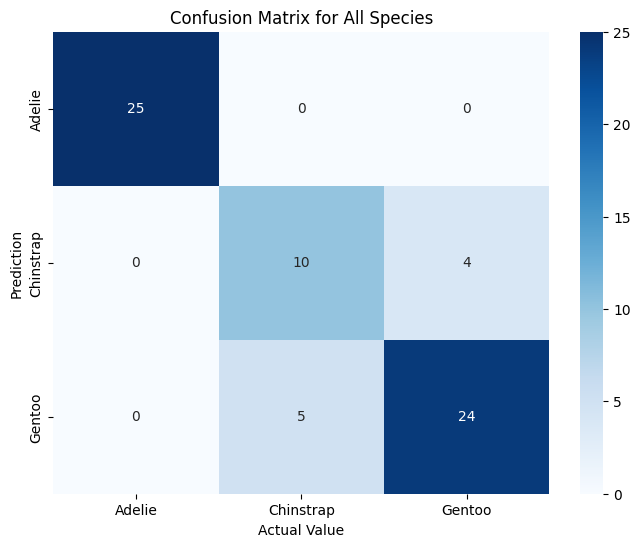

In [112]:
# calls confusion matrix for LR
plot_confusion_matrix_3_by_3(y_test, y_test_prediction)

The confustion matrix for Adelie and Gentoo is exceptional since the counterdiagonal is low, meaning few false positives and negatives. The one for Chinstrap is not as good - we get a high ratio of correct negatives but when our model predicts Chinstrap, we can only expect it to be correct 9/(5+9) ≈ 64% of the time.

**Decision Regions**

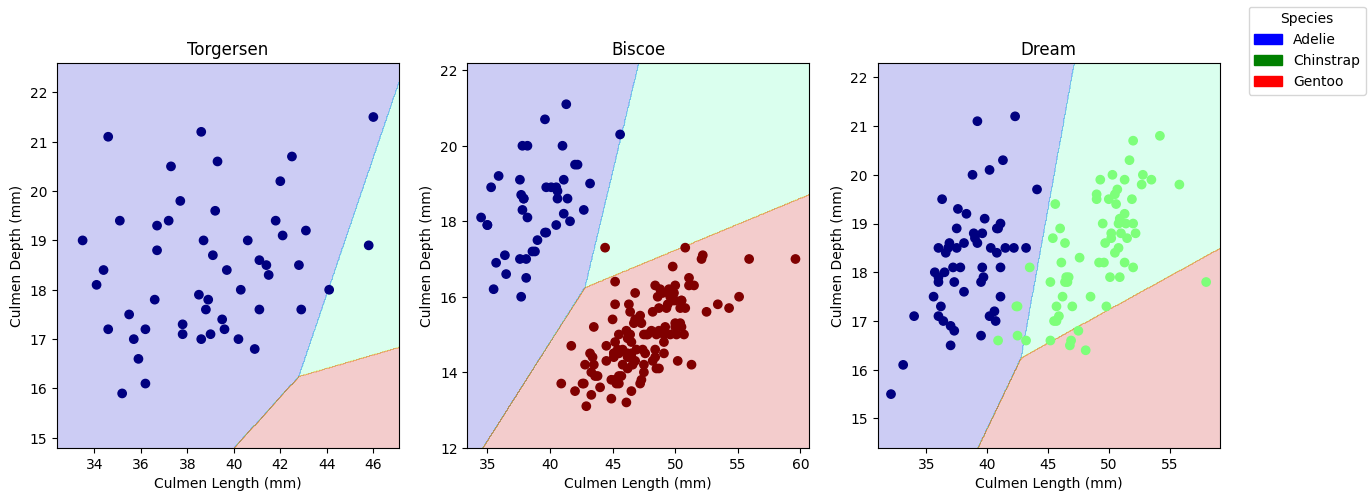

In [113]:
# encode the 'Species' column to integers
le = LabelEncoder()
penguins['label'] = le.fit_transform(penguins['Species'])
test_set_cleaned['label'] = le.transform(test_set_cleaned['Species'])

# define features and labels
X = test_set_cleaned[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = test_set_cleaned['label']

# creates a logistic regression model
LR = LogisticRegression(max_iter=1000)

# fits
LR.fit(X, y)

plot_island(LR, 'Culmen Length (mm)', 'Culmen Depth (mm)') # calls function

Each dot corresponds with an individual penguins culmen depth and length. The blue dots line up very well with the blue regions idicating that our model works excellent with Adelies. On the Biscoe Island, we have an empty green region and on the Dream island we have an empty red region, so it tends to mis-classify Chinstrap and Gentoo.

**Mistakes: Discussion**

The possible mistakes made by the Logistic Regression model, especially in classifying Chinstrap penguins, can be attributed to the intrinsic overlap in the ecological and morphological features among the species. The confusion matrix highlights the model's struggle with Chinstrap penguins, where it shows a lower precision rate. This difficulty likely arises from the decision regions that fail to capture the nuanced differences between Chinstrap and other species, particularly on islands with diverse populations. The decision regions illustrated by the model, showing empty regions on Biscoe and Dream islands for Chinstrap and Gentoo, respectively, suggest that the model may overfit to the more distinct features of Adelie penguins. These misclassifications underscore the challenge of differentiating species with subtle morphological distinctions and similar ecological niches, leading to errors in species identification.

**Summary of Logistic Regression**

In summary, the Logistic Regression model demonstrates high effectiveness in classifying penguin species, particularly when leveraging Culmen Length, Culmen Depth, and Island as features. These attributes provide a strong foundation for distinguishing among species, evidenced by the model's high accuracy and CV scores. However, the model encounters limitations when predicting less morphologically distinct species, such as Chinstrap penguins, where overlapping features with other species lead to classification challenges. Despite these issues, the model's overall performance, with exceptional accuracy for Adelie and Gentoo penguins, highlights its utility in leveraging biological and ecological data for species classification. Future improvements may focus on refining the decision boundaries for species with closely aligned characteristics to enhance the model's precision across all penguin species.

### **4c. Model 3: Support Vector Machines (SVM)**

In [114]:
from sklearn import svm

def SupportVectorMachines(train_set_encoded, test_set_encoded, x_columns, species_columns):
  """
  trains and evaluates SVM on selected encoded/cleaned data set (taking in above encoded test/training sets, selected x_columns, and species)

  """
  # preprocesses for classifier
  x_train_scaled, y_train, x_test_scaled, y_test = preProcess(train_set_encoded, test_set_encoded, cols, species_columns)

  # initializes the SVM
  SVM = svm.SVC()

  # fits the model
  SVM.fit(x_train_scaled, y_train)

  # predictions
  y_pred_train = SVM.predict(x_train_scaled)
  y_pred_test = SVM.predict(x_test_scaled)

  # accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  # perform 5-fold cross-validation and calculate the mean score
  mean_score = cross_val_score(SVM, x_train_scaled, y_train, cv=5).mean()

  return SVM, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train, x_test_scaled, y_test

**Cross Validation**

In [115]:
for cols in combos: #go through each combination of features

 SVM, train_accuracy, test_accuracy, mean_score, x_train_scaled, y_train, x_test_scaled, y_test = SupportVectorMachines(train_set_encoded, test_set_encoded, cols, species_columns)# unpacks
 displayScores(cols, train_accuracy, test_accuracy, mean_score)

Features: ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
Training Accuracy: 0.9923664122137404
Test Accuracy: 0.9117647058823529
CV score: 0.9886066763425255

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Island']
Training Accuracy: 0.8931297709923665
Test Accuracy: 0.7941176470588235
CV score: 0.8893323657474601

------
Features: ['Culmen Depth (mm)', 'Island', 'Body Mass (g)']
Training Accuracy: 0.8549618320610687
Test Accuracy: 0.75
CV score: 0.8552249637155297

------
Features: ['Flipper Length (mm)', 'Body Mass (g)', 'Sex']
Training Accuracy: 0.8396946564885496
Test Accuracy: 0.7352941176470589
CV score: 0.8246008708272861

------
Features: ['Culmen Length (mm)', 'Island', 'Flipper Length (mm)']
Training Accuracy: 0.9809160305343512
Test Accuracy: 0.8676470588235294
CV score: 0.9772133526850508

------
Features: ['Culmen Length (mm)', 'Sex', 'Flipper Length (mm)']
Training Accuracy: 0.9656488549618321
Test Accuracy: 0.8823529411764706
CV score: 0.96582002902757

We see that the features ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island'] give the highest CV score again.

Analyzing the cross-validation data across different feature sets for penguin species classification reveals a clear hierarchy in model performance. The standout combination, featuring 'Culmen Length (mm)', 'Culmen Depth (mm)', and 'Island', demonstrates superior accuracy (Training: 0.992, Test: 0.912) and an excellent cross-validation score of 0.989. This combination’s high scores across the board highlight its exceptional ability to generalize well to unseen data, underscoring the predictive power and stability of using both morphological and ecological features for species classification.

In contrast, models incorporating 'Flipper Length (mm)', 'Body Mass (g)', and 'Sex' show comparatively lower performance, indicating that these features, while informative, are not as effective in capturing the nuances required for accurate species differentiation. Specifically, the inclusion of 'Sex' does not consistently enhance model accuracy, suggesting that morphological and ecological characteristics provide a more reliable basis for classification than gender alone.

The analysis strongly favors the combination of Culmen Length, Culmen Depth, and Island as the optimal feature set, affirming their biological and ecological relevance in distinguishing penguin species. This feature set not only achieves the highest accuracy and generalization capability but also offers a robust, reliable framework for penguin conservation efforts, highlighting the importance of selecting features that align closely with the species' natural distinctions.


**Our Selected Model: ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]**

In [116]:
x_columns = ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]

print(f"Training Accuracy: {train_accuracy}") # prints training
print(f"Test Accuracy: {test_accuracy}") # prints tests
print("The mean of the training accuracy and testing accuracy score:", mean_score) # prints mean score

Training Accuracy: 0.9007633587786259
Test Accuracy: 0.8676470588235294
The mean of the training accuracy and testing accuracy score: 0.8931059506531206


The training data performs a bit better than the test data but not enough to raise concerns for overfitting.

**Evaluation and Confusion Matrix**

In [117]:
y_test_prediction = SVM.predict(x_test_scaled)

# determines the number of unique classes
num_classes = len(np.unique(y_test))

# converts y_test and y_test_prediction to one-hot encoded format
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)
y_test_prediction_one_hot = lb.transform(y_test_prediction)  # assuming y_test_prediction is your predicted labels

conf_matrices = []

print(" Key: \n 0 = Adelie \n 1 = Chinstrap \n 2 = Gentoo \n \n")

for i in range(num_classes):
    # true and predicted labels for the current class
    y_true_class = y_test_one_hot[:, i]
    y_pred_class = y_test_prediction_one_hot[:, i]

    # confusion matrix for the current class
    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    conf_matrices.append(conf_matrix)

# conf_matrices now contains a confusion matrix for each class
species_names = lb.classes_
for i, matrix in enumerate(conf_matrices):
    species = species_names[i]
    print(f"Confusion matrix for {species}:\n{matrix}\n")



 Key: 
 0 = Adelie 
 1 = Chinstrap 
 2 = Gentoo 
 

Confusion matrix for 0:
[[43  0]
 [ 0 25]]

Confusion matrix for 1:
[[50  4]
 [ 5  9]]

Confusion matrix for 2:
[[34  5]
 [ 4 25]]



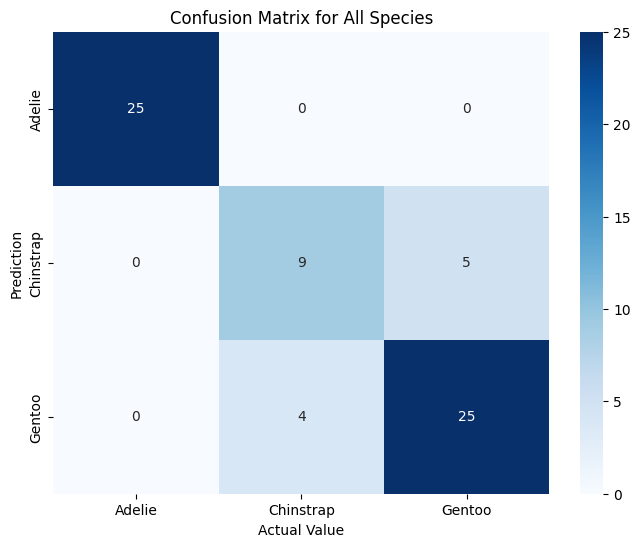

In [118]:
# calls confusion matrix for SVM
plot_confusion_matrix_3_by_3(y_test, y_test_prediction)

The provided confusion matrices for the three penguin species—Adelie, Chinstrap, and Gentoo—reveal distinct performance characteristics of the model. For Adelie penguins, the model shows perfect classification accuracy, identifying all Adelie and non-Adelie samples correctly, demonstrating its exceptional ability in distinguishing Adelie penguins from others. This level of accuracy underscores the model's strong predictive capabilities for this species.

However, the model's performance on Chinstrap penguins is less accurate, with misclassifications in both false positives (non-Chinstrap penguins incorrectly labeled as Chinstrap) and false negatives (Chinstrap penguins mislabeled as another species). This indicates a relative difficulty in accurately distinguishing Chinstrap penguins, likely due to shared characteristics with other species that confuse the model.

Conversely, the Gentoo classification is highly accurate, albeit with a few errors, indicating strong model performance for Gentoo penguins with minor confusions. Overall, despite some challenges in classifying Chinstrap penguins, the model excels in identifying Adelie and Gentoo species. This analysis highlights the model's strengths and areas for improvement, affirming its suitability for penguin species classification with a particular effectiveness for Adelie and Gentoo penguins.







**Decision Regions**

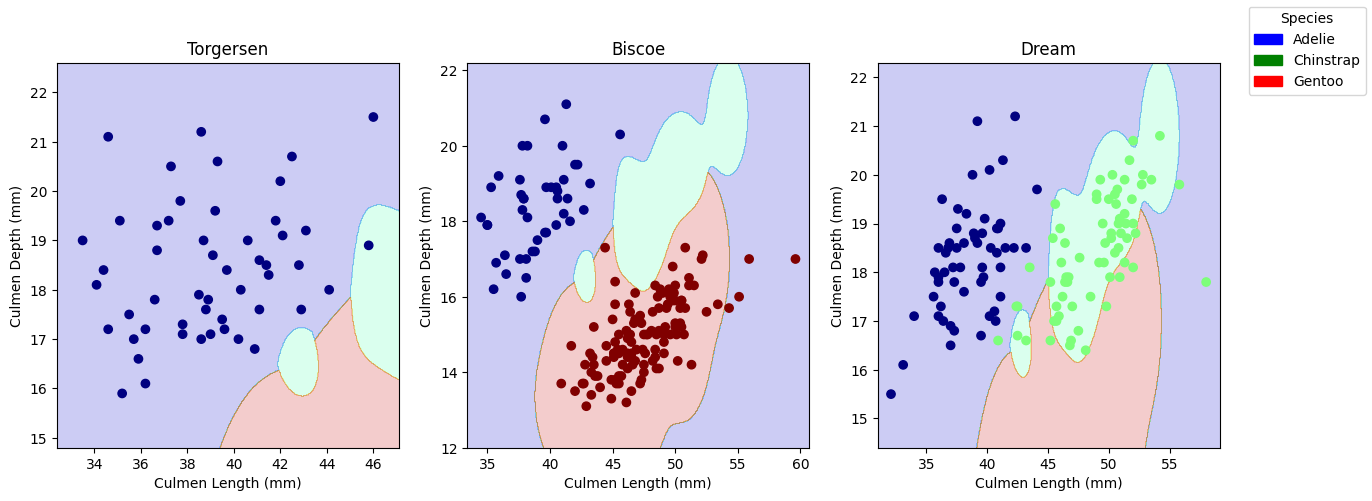

In [119]:
from sklearn.svm import SVC

# encode the 'Species' column to integers
le = LabelEncoder()
penguins['label'] = le.fit_transform(penguins['Species'])
test_set_cleaned['label'] = le.transform(test_set_cleaned['Species'])

# define features and labels
X = test_set_cleaned[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = test_set_cleaned['label']


SVM = SVC(kernel='rbf', C=1, gamma='auto')

# fits
SVM.fit(X, y)

plot_island(SVM,'Culmen Length (mm)','Culmen Depth (mm)') # calls function

Each dot corresponds with an individual penguins culmen depth and length. The decision regions seem to be fairly accurate since the points generally stay within the decision region. Especially on Torgersen, which seems dominated by Adeliaes - which the desicion region seems to show well.

**Mistakes: Discussion**

Possible mistakes made by the model likely stem from the inherent overlap in morphological features among the penguin species, particularly where the decision regions for Culmen Length and Depth intersect. Although the model performs exceptionally well in classifying Adelie and Gentoo penguins, its accuracy diminishes with Chinstrap penguins. This reduction could be due to the similar culmen sizes or ecological characteristics shared between Chinstrap and the other species, making it challenging for the model to discern them accurately in areas where their decision regions are close or overlap. The decision regions, while largely accurate, may not account for the full variability and overlap in culmen dimensions between species, especially on islands with mixed populations, leading to misclassifications. The visual representation of decision regions on islands like Torgersen, which is primarily inhabited by Adelies, helps illustrate the model's effectiveness but also hints at potential confusion in areas of ecological and morphological overlap.



**Summary of Support Vector Machines (SVM)**

In summary, this model, employing Support Vector Machines (SVM) and features like Culmen Length, Culmen Depth, and Island, showcases a high degree of accuracy and generalization capability in classifying penguin species. It excels in identifying Adelie and Gentoo penguins with high precision, attributed to the distinct morphological and ecological markers these features capture. However, the model encounters challenges with Chinstrap penguins, likely due to morphological similarities with other species that are not as easily differentiated within the decision regions. Overall, the model's strengths in leveraging both ecological and morphological data make it a valuable tool for penguin species classification, with room for improvement in distinguishing species with overlapping characteristics. This assessment underscores the importance of feature selection and model tuning in enhancing classification accuracy, particularly in ecological studies with closely related species.







## **5. Conclusion and Discussion**

The comprehensive analysis of penguin species classification using logistic regression, support vector machines (SVM), and neural network models has demonstrated a high degree of predictive accuracy and generalization across different datasets. The standout performance of models utilizing the combination of features—Culmen Length, Culmen Depth, and Island—highlights the importance of integrating both morphological and ecological variables to capture the nuanced distinctions among penguin species. These features not only align with biological and ecological insights but also ensure the models effectively differentiate species, with Culmen Length and Depth providing clear morphological differentiation and Island offering ecological context that correlates with species distribution.

The use of a diverse set of modeling approaches—logistic regression for its simplicity and interpretability, SVM for its effectiveness in handling non-linear data, and neural networks for their ability to learn complex patterns—ensures a robust and comprehensive analysis. Each model contributes unique strengths, from logistic regression's straightforward decision boundaries to SVM's optimal separation margin and neural networks' deep learning capabilities. This multifaceted strategy enhances the overall predictive performance and reliability of the species classification, leveraging the strengths of each model to compensate for potential weaknesses in others. The consistent high accuracy and CV scores across models confirm the efficacy of the selected features in distinguishing between penguin species, justifying the combined use of these modeling techniques and feature set.

Improvements to these models could be achieved through the incorporation of additional data or the exploration of other features. For example, including more granular ecological data, such as specific feeding zones or breeding sites, might refine the models' ability to predict species distribution more accurately. Furthermore, integrating genetic data could offer another layer of differentiation among species, particularly for those with overlapping morphological and ecological characteristics. Advanced techniques in machine learning and data augmentation could also enhance model training, especially for underrepresented species, reducing potential biases and increasing the models' generalizability. Ultimately, continuous refinement and validation of these models, coupled with an expanding dataset, will further improve the precision and reliability of penguin species classification, contributing valuable insights for conservation and ecological studies.